The following model fittings and calculations aim to show skills in: 1) manipulating data with NumPy arrays; 2) creating functions for efficient statistics analysis; 3) understanding plot residuals (exponential curve); 4) showing plots for specific subsets of data (Gaussian curve).

Here, packages were imported into Python to appropriately work with data. NumPy (includes a wide variety of libraries) was used for manipulating arrays and some statistical analysis. Matplotlib.pyploy was used to plot data. 'Math' was used to perform basic calculations in created functions. 'Curve_fit' was used for fitting exponential and Gaussian data and providing error measurements. 'Asarray' converts data into an array for fitting a certain model (double-check this). 'LinearRegression' was used for fitting linear calibration curve data and providing analytical figures of merit.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from sklearn.linear_model import LinearRegression
import pandas as pd

Curve functions are defined to use with curve_fit commands.

In [2]:
def exponential(x, a, k, b):
    ''''Will return the function y = a exp(k*x) + b for any data set x sent to the function'''
    return a*np.exp(k*x) + b
def gauss_function(x,a1,a2,b1,b2,c1,c2,o):
    ''''Will return a normal distribution curve for a data set x and constants a, b, and c; double variables used for identifying two Gaussian curves in data'''
    return a1*np.exp(-(x-b1)**2/(2*c1**2))+a2*np.exp(-(x-b2)**2/(2*c2**2)) + o

# Linear Data Set Example

For linear calibration curve data, statistical parameters and analytical figures of merit (AFMs) are defined. Y-axis data is placed into a NumPy array.

In [3]:
#Using population standard deviation -- check if numpy has sample standard deviation
def CI(t, stdev, n):
    return (t*stdev)/(math.sqrt(n))
def RSD(stdev, mean):
    return (stdev/mean)*(100)
def LOD(stdev_blank, slope):
    return (3*stdev_blank) / (slope)
def LLOQ(stdev_blank, yint):
    return (10*stdev_blank) + (yint)
def errmean(stdev, n):
    return (stdev)/(math.sqrt(n))
def sens(slope, stdev):
    return(slope/stdev)
data1 = np.array([[1.3, 1.1, 1.3], [1.5, 1.5, 1.9], [1.9, 2.1, 2], [2.2, 2.2, 2], [2.3, 2.2, 2.3], [2.5, 2.6, 2.6], [2.9, 3, 3], [3.2, 3.2, 3.4], [3.7, 3.8, 3.6], [4.2, 4.5, 4.6], [6.2, 6, 5.9], [8.5, 8.8, 8.6]])
t1=4.303

1) X and y-axis values are defined and reshaped as 2-D datasets to be compatiable with curve fitting. 2) The linear regression model is defined and gives predicted y-values based on experimental y data. The slope and y-intercept are provided for later AFM calculations. Linearity is assessed with an R-squared value. 3) Error bars are defined with the 95% confidence intervals of averaged data points.

predicted y values:
[[1.50104977]
 [1.68100307]
 [1.86095637]
 [2.04090968]
 [2.22086298]
 [2.58076958]
 [2.94067619]
 [3.3005828 ]
 [3.6604894 ]
 [4.38030261]
 [5.99988234]
 [8.69918188]]
intercept: [1.50104977]
slope: [[0.1799533]]
R squared value: 0.9976394542763032


Text(0.5, 0, 'Compound Concentration (pg/mL)')

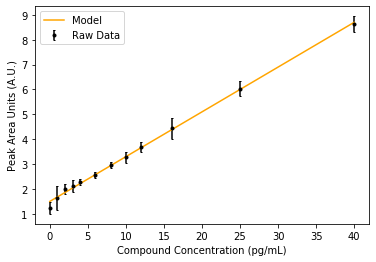

In [4]:
x = np.array([0, 1, 2, 3, 4, 6, 8, 10, 12, 16, 25, 40])
y = np.mean(data1, axis=1)
x, y = np.array(x).reshape((-1, 1)), np.array(y).reshape((-1, 1))
lr = LinearRegression()
#Telling model to use the given data
lr.fit(x, y)
#Making predictions with the data
y_predict = lr.predict(x)
print('predicted y values:', y_predict, sep='\n')
#Printing relevant coefficients and values of line
print('intercept:', lr.intercept_)
print('slope:', lr.coef_)
r_sq = lr.score(x,y)
print('R squared value:', r_sq)
plt.errorbar(x, y, yerr=CI(t1, np.std(data1, axis=1), np.size(data1[0])), color='black', capsize=1, marker ='.', linestyle = 'None')
plt.plot(x, y_predict, color='orange', linewidth=1.5)
plt.legend(("Model", "Raw Data"))
plt.ylabel("Peak Area Units (A.U.)")
plt.xlabel("Compound Concentration (pg/mL)")
#Next, learn how to do figure captions - just do in markdown and add to Word/wherever paper is

AFMs that define the precision and sensitivity of the calibrated method:

In [6]:
RSDs = RSD(np.std(data1, axis=1, ddof=1), np.mean(data1, axis=1))
LOD1 = LOD(np.std(data1[0]), lr.coef_[0])
LLOQ1 = LLOQ(np.std(data1[0]), lr.intercept_[0])
#before adding the [0], saved it as an array that has one axis and one data point
print("Relative standard deviations (%) are", RSDs)
print("Limit of detection is", LOD1, "pg/mL")
print("Lower limit of quantification is", LLOQ1, "pg/mL")
#Learn how to get these in coherent tables and cut down significant figures

Relative standard deviations (%) are [ 9.3624368  14.13919027  5.          5.41265877  2.54713354  2.24941663
  1.9461245   3.53479757  2.7027027   4.69548722  2.53180978  1.76933425]
Limit of detection is [1.57175616] pg/mL
Lower limit of quantification is 2.4438588090153726 pg/mL


In [48]:
def truncate(n, decimals=2):
    multiplier = 10 ** decimals
    return int(n * multiplier) / multiplier
truncate(12.945835983)
#Cool that this works for single numbers, but doesn't work for arrays

12.94

In [50]:
np.round(RSDs, 2)
#Success!

array([ 9.36, 14.14,  5.  ,  5.41,  2.55,  2.25,  1.95,  3.53,  2.7 ,
        4.7 ,  2.53,  1.77])

In [7]:
#Redo of linear curve with keeping data together; need to put x-values in front of each set
data2 = np.array([[0, 1.3, 1.1, 1.3], [1, 1.5, 1.5, 1.9], [2, 1.9, 2.1, 2], [3, 2.2, 2.2, 2], [4, 2.3, 2.2, 2.3], [6, 2.5, 2.6, 2.6], [8, 2.9, 3, 3], [10, 3.2, 3.2, 3.4], [12, 3.7, 3.8, 3.6], [16, 4.2, 4.5, 4.6], [25, 6.2, 6, 5.9], [40, 8.5, 8.8, 8.6]])
data2[:,1:12]

array([[1.3, 1.1, 1.3],
       [1.5, 1.5, 1.9],
       [1.9, 2.1, 2. ],
       [2.2, 2.2, 2. ],
       [2.3, 2.2, 2.3],
       [2.5, 2.6, 2.6],
       [2.9, 3. , 3. ],
       [3.2, 3.2, 3.4],
       [3.7, 3.8, 3.6],
       [4.2, 4.5, 4.6],
       [6.2, 6. , 5.9],
       [8.5, 8.8, 8.6]])

In [8]:
data2[:,0]

array([ 0.,  1.,  2.,  3.,  4.,  6.,  8., 10., 12., 16., 25., 40.])

predicted y values:
[1.50104977 1.68100307 1.86095637 2.04090968 2.22086298 2.58076958
 2.94067619 3.3005828  3.6604894  4.38030261 5.99988234 8.69918188]
intercept: 1.5010497674333094
slope: [0.1799533]
R squared value: 0.9976394542763032


Text(0.5, 0, 'Compound Concentration (pg/mL)')

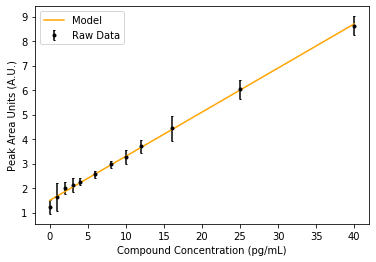

In [9]:
#success in keeping data together! y didn't have to be reshaped because it matched the (new) shape of x
x = data2[:,0]
y = np.mean(data2[:,1:12], axis=1)
x, y = x.reshape((-1, 1)), y
lr = LinearRegression()
#Telling model to use the given data
lr.fit(x, y)
#Making predictions with the data
y_predict = lr.predict(x)
print('predicted y values:', y_predict, sep='\n')
#Printing relevant coefficients and values of line
print('intercept:', lr.intercept_)
print('slope:', lr.coef_)
r_sq = lr.score(x,y)
print('R squared value:', r_sq)
plt.errorbar(x, y, yerr=CI(t1, np.std(data2[:,1:12], axis=1, ddof=1), 3), color='black', capsize=1, marker ='.', linestyle = 'None')
plt.plot(x, y_predict, color='orange', linewidth=1.5)
plt.legend(("Model", "Raw Data"))
plt.ylabel("Peak Area Units (A.U.)")
plt.xlabel("Compound Concentration (pg/mL)")

In [34]:
std_values = np.std(data2[:,1:12], axis=1, ddof=1)
new_std_values = np.split(std_values, 12)
mean_values = np.mean(data2[:,1:12])
new_mean_values = np.split(mean_values, 3)

IndexError: tuple index out of range

In [38]:
RSDs2 = RSD(std_values, mean_values)
SEMs = errmean(np.std(data2[:,1:12], axis=1, ddof=1), 3)
AS = sens(lr.coef_[0], np.std(data2[:,1:12], axis=1, ddof=1))

In [39]:
#Putting data into tables with appropriate sig figs
df = pd.DataFrame({"Relative standard deviation (%)": [RSDs2], "Standard error of mean": [SEMs], "Analytical sensitivity": [AS],})

In [40]:
df

,Relative standard deviation (%),Standard error of mean,Analytical sensitivity
0,"[3.3906377962196608, 6.7812755924393215, 2.936...","[0.06666666666666665, 0.1333333333333333, 0.05...","[1.5584413173244431, 0.7792206586622216, 1.799..."


# Exponential Data Set Example

Exponential experimental data is loaded from a .csv file; 'unpack = True' allows argument arrays to be unpacked in an x, y, z...fashion for modeling. All data points are plotted below.

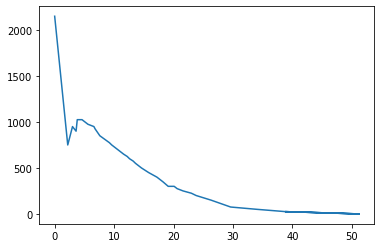

In [13]:
#Always check the original data file in Jupyter if error messages pop up; could be an unnecessary space or character causing loading problems
raw_time, raw_volume = np.loadtxt("Mentos and Coke 2-2021.csv", delimiter=',', usecols=(0,1), unpack = True)
plt.plot(raw_time,raw_volume)

An index is defined to omit data that is not relevant to the exponential curve. New arrays for the x- and y-axis are created based on the index.

Text(0.5, 0, 'Time (sec)')

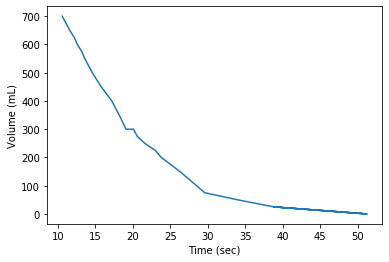

In [14]:
index = 12
plt.plot(raw_time[index:], raw_volume[index:])
time = raw_time[index:]
volume = raw_volume[index:]
plt.ylabel("Volume (mL)")
plt.xlabel("Time (sec)")

Computer calculations can estimate optimized parameters for fitting raw data to an expoential model based on minimized sum of squares residuals ('popt_first'). The 'p0' function allows a user to restrict the computer's predictions for better parameter estimates.

'Perr_first' calculates the standard deviation of the predicted parameters and is used to calculate the uncertainty (relative error, %) of the parameters. The error for eeach parameter is shown in a bar chart.

[-2.01256031e-20  9.99999520e-01  3.46428834e+02]
[ 1.93870575e+03 -8.91092286e-02 -3.32176598e+01]
[5.57348729e+01 2.85122981e-03 8.61185568e+00]


C:\Users\krbar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Parameters of Model Equation')

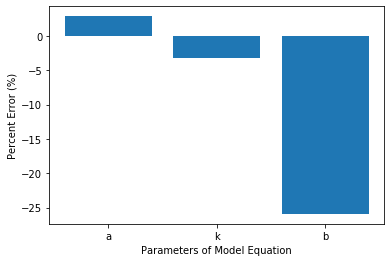

In [15]:
popt_first, pcov_first = curve_fit(exponential, time, volume)
print(popt_first)
#First line

popt_first, pcov_first = curve_fit(exponential, time, volume, p0=(750, -1, 0))
print(popt_first)
#Second line

perr_first = np.sqrt(np.diag(pcov_first))
print(perr_first)
#Third line
plt.bar(('a','k','b'), perr_first/popt_first*100)
plt.ylabel("Percent Error (%)")
plt.xlabel("Parameters of Model Equation")
#overflow = system encountered a large number, then went a different direction for estimation
#a = the top of the curve on the y-axis (defines shape), k = rate of growth (+) or decay (-) (defines overall curvature), b = where the baseline hits

Residuals (shown in green plot) verify the validity of a model fitting to raw data; the more "random" a residual plot it, the better the model fitting (less systematic error/bias). The 'subplot' function allows the model fitting and residual plots to be stacked.

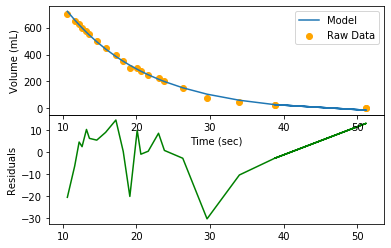

In [16]:
plt.subplot(212)
#212 = 2 rows, 1 column
#The residual plot
plt.plot(time, volume-exponential(time, popt_first[0],popt_first[1], popt_first[2]),'g')
plt.ylabel("Residuals")
plt.subplot(211, sharex=plt.gca())
#now working on the first plot
#gca = 
plt.scatter(time,volume, color='orange')
plt.plot(time, exponential(time, popt_first[0],popt_first[1], popt_first[2]))
plt.legend(("Model", "Raw Data"))
plt.ylabel("Volume (mL)")
plt.xlabel("Time (sec)")
plt.subplots_adjust(hspace=0)

In [17]:
help(plt.legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs)
    Place a legend on the axes.
    
    Call signatures::
    
        legend()
        legend(labels)
        legend(handles, labels)
    
    The call signatures correspond to three different ways how to use
    this method.
    
    **1. Automatic detection of elements to be shown in the legend**
    
    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.
    
    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::
    
        line, = ax.plot([1, 2, 3], label='Inline label')
        ax.legend()
    
    or::
    
        line.set_label('Label via method')
        line, = ax.plot([1, 2, 3])
        ax.legend()
    
    Specific lines can be excluded from the automatic legend element
    selection by defining a label st

# Gaussian Data Set Example

Data from a fluorescence spectroscopy spectrum imported as shown with the exponential model fitting.

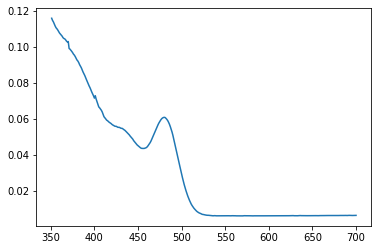

In [18]:
wvlngth, intensity = np.loadtxt("30s031320.txt", usecols=(0,1), unpack = True)
index = 350
plt.plot(wvlngth[:index], intensity[:index])

The defined Gaussian function assumes there are two Gaussian curves to fit; the most prominent curve (maximum approx. 480 nm) is fitted in the cell below. Relative errors for all estimated parameters are shown in a bar chart.

[1.19725984e-01 3.84588012e-02 3.12503118e+02 4.80428715e+02
 8.46752592e+01 1.38168875e+01 5.38158698e-03]
[3.01979144e-03 6.87647959e-04 4.62311309e+00 2.41934146e-01
 2.46453025e+00 3.11253810e-01 2.08086823e-04]


Text(0.5, 0, 'Parameters of Model Equation')

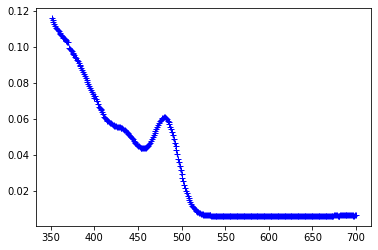

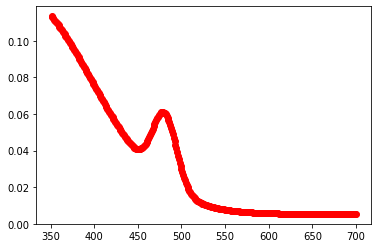

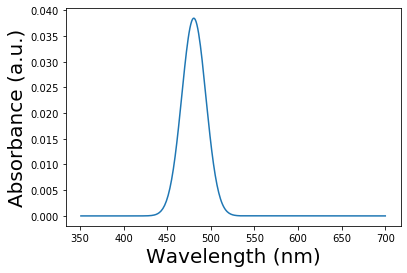

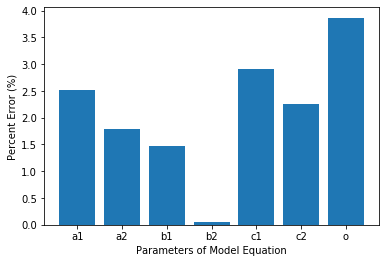

In [19]:
x=wvlngth[:index]
y=intensity[:index]
n=len(x)
#Number of data points

popt,pcov = curve_fit(gauss_function, x, y, p0 = [0.12, 0.05, 350, 480, 50, 1, 0])

plt.figure(1)
plt.plot(x,y,'b+:',label='data')
#This is plotting the original data with the new x and y defined variables

plt.figure(2)
plt.plot(x, gauss_function(x, *popt), 'ro:', label='fit')
#optimizes parameter values so the sum of squared residuals is minimized (if y data was subtracted)
#The fit of the data assuming multiple Gaussians

plt.figure(3)
plt.plot(x, popt[1]*np.exp(-(x-popt[3])**2/(2*popt[5]**2)))
#I think this is optimizing a1, b1, and c1 specifically and focusing on the curve itself
plt.ylabel("Absorbance (a.u.)", fontsize=20)
plt.xlabel("Wavelength (nm)", fontsize=20)

popt_sec, pcov_sec = curve_fit(gauss_function, x, y, p0 = [0.12, 0.05, 350, 480, 50, 1, 0])
perr_sec = np.sqrt(np.diag(pcov_sec))
print(popt_sec)
print(perr_sec)
plt.figure(4)
plt.bar(('a1','a2','b1','b2','c1','c2','o'), perr_sec/popt_sec*100)
plt.ylabel("Percent Error (%)")
plt.xlabel("Parameters of Model Equation")

The other Gaussian curve (maximum approx. 350 nm) is fitted with an adjusted x-axis.

[1.19725984e-01 3.84588012e-02 3.12503118e+02 4.80428715e+02
 8.46752592e+01 1.38168875e+01 5.38158698e-03]
[3.01979144e-03 6.87647959e-04 4.62311309e+00 2.41934146e-01
 2.46453025e+00 3.11253810e-01 2.08086823e-04]


Text(0.5, 0, 'Parameters of Model Equation')

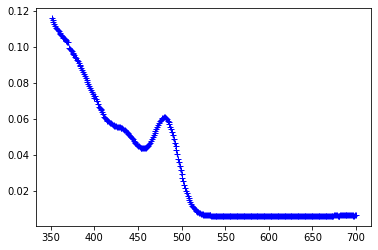

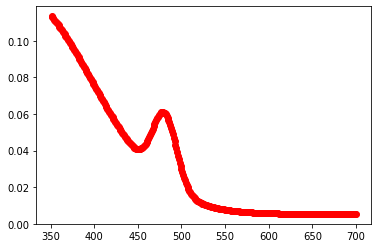

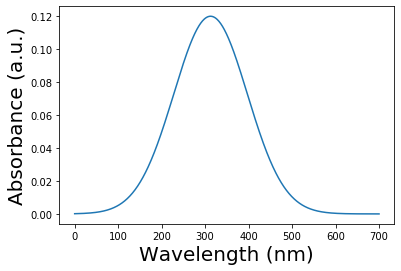

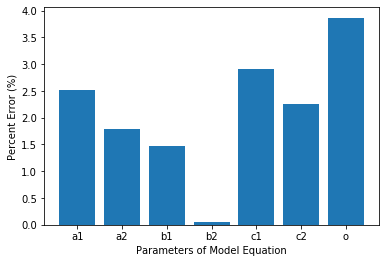

In [20]:
x=wvlngth[:index]
y=intensity[:index]
n=len(x)

popt,pcov = curve_fit(gauss_function, x, y, p0 = [0.12, 0.05, 350, 480, 50, 1, 0])

plt.figure(1)
plt.plot(x,y,'b+:',label='data')

plt.figure(2)
plt.plot(x, gauss_function(x, *popt), 'ro:', label='fit')

plt.figure(3)
x_adjust = np.arange(0, 701, 1)
plt.plot(x_adjust, popt[0]*np.exp(-(x_adjust-popt[2])**2/(2*popt[4]**2)))
plt.ylabel("Absorbance (a.u.)", fontsize=20)
plt.xlabel("Wavelength (nm)", fontsize=20)


popt_sec, pcov_sec = curve_fit(gauss_function, x, y, p0 = [0.12, 0.05, 350, 480, 50, 1, 0])
perr_sec = np.sqrt(np.diag(pcov_sec))
print(popt_sec)
print(perr_sec)
plt.figure(4)
plt.bar(('a1','a2','b1','b2','c1','c2','o'), perr_sec/popt_sec*100)
plt.ylabel("Percent Error (%)")
plt.xlabel("Parameters of Model Equation")

Next steps: Accessing t-table in Python; continuing to learn about broadcasting; more advanced statistical packages; looking back at questions in comments.

Author: Karis Barnett | Last modified: 2/21/2021